In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Preview of data
data_train = pd.read_csv('/content/train_LZdllcl.csv')
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [65]:
# Check for missing values
data_train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [66]:
# Summary statistics for numerical columns
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


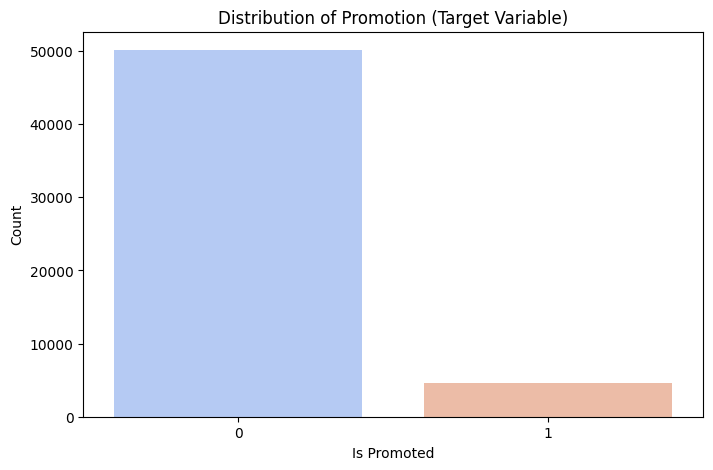

In [67]:
# Distribution of target variable (is_promoted)
plt.figure(figsize=(8, 5))
sns.countplot(x='is_promoted', data=data_train, palette='coolwarm')
plt.title('Distribution of Promotion (Target Variable)')
plt.xlabel('Is Promoted')
plt.ylabel('Count')
plt.show()

In [68]:

# handling missing values
data_train['previous_year_rating'].fillna(data_train['previous_year_rating'].median(), inplace=True)
data_train['education'].fillna(data_train['education'].mode()[0], inplace=True)
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [69]:
data_train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [70]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoders = {}
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for col in categorical_cols:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    label_encoders[col] = le

# Scale numeric features
scaler = StandardScaler()
numeric_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
data_train[numeric_cols] = scaler.fit_transform(data_train[numeric_cols])

# Confirm the transformations
print(data_train.head())

   employee_id  department  region  education  gender  recruitment_channel  \
0        65438           7      31          2       0                    2   
1        65141           4      14          0       1                    0   
2         7513           7      10          0       1                    2   
3         2542           7      15          0       1                    0   
4        48945           8      18          0       1                    0   

   no_of_trainings       age  previous_year_rating  length_of_service  \
0        -0.415276  0.025598              1.395766           0.500460   
1        -0.415276 -0.627135              1.395766          -0.437395   
2        -0.415276 -0.104948             -0.250651           0.265996   
3         1.226063  0.547785             -1.897069           0.969387   
4        -0.415276  1.331064             -0.250651          -0.906322   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1           

In [71]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_train.drop(columns=['employee_id', 'is_promoted'])
y = data_train['is_promoted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9345010034665208
Confusion Matrix:
 [[9989   65]
 [ 653  255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.42       908

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

# Load train data
data_train = pd.read_csv('/content/train_LZdllcl.csv')

# Handle missing values
data_train['previous_year_rating'].fillna(data_train['previous_year_rating'].median(), inplace=True)
data_train['education'].fillna(data_train['education'].mode()[0], inplace=True)

# Encode categorical features
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    label_encoders[col] = le

# Scale numeric features
numeric_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
scaler = StandardScaler()
data_train[numeric_cols] = scaler.fit_transform(data_train[numeric_cols])

# Save encoders and scaler
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Prepare features and target
X = data_train.drop(columns=['employee_id', 'is_promoted'])
y = data_train['is_promoted']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Model Evaluation
y_pred = rf_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.9345010034665208
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.42       908

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962

Confusion Matrix:
 [[9989   65]
 [ 653  255]]


In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load test data
test_data = pd.read_csv('/content/test_2umaH9m.csv')

# Handle missing values in test data
test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median(), inplace=True)
test_data['education'].fillna(test_data['education'].mode()[0], inplace=True)

# Encode categorical features
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for col in categorical_cols:
    le = label_encoders[col]  # Use the encoders fitted on the training data
    test_data[col] = le.transform(test_data[col])

# Scale numeric features
numeric_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

# Ensure only feature columns are included (excluding 'employee_id')
X_test = test_data.drop(columns=['employee_id'])

# Load the trained model
rf_model = joblib.load('random_forest_model.pkl')

# Make predictions
test_data['is_promoted'] = rf_model.predict(X_test)

# Save predictions to CSV
output = test_data[['employee_id', 'is_promoted']]
output.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")


Predictions saved to 'predictions.csv'
